In [ ]:
from openai import OpenAI

# API
client =

#prompt usuario
tareas = """
Preparar presentación final
Estudiar para el examen
Organizar los archivos de la suguiente presentacioon
Enviar emails pendientes
"""
#zero
def zero_shot(tareas):

    prompt = f"""
    Organiza las siguientes tareas según prioridad e impacto.
    Devuelve la respuesta en el siguiente formato:

    1. Lista priorizada
    2. Plan paso a paso
    3. Resumen ejecutivo

    Tareas:
    {tareas}
    """
    response = client.chat.completions.create(
        model="",
        messages=[{"role": "user", "content": prompt}]
    )

    return response.choices[0].message.content


zero = zero_shot(tareas)
print("Zero shot")
print(zero)

#one
def one_shot(tareas):

    prompt = f"""
    Utiliza este ejemplo:

    1. Estudiar examen (Alta prioridad)
    2. Preparar presentación (Media prioridad)

    Plan:
    Paso 1: Estudiar temas críticos
    Paso 2: Preparar diapositivas

    Resumen:
    Priorizar tareas académicas críticas primero.

    Para organizar las siguientes tareas:

    {tareas}
    """
    response = client.chat.completions.create(
        model="",
        messages=[{"role": "user", "content": prompt}]
    )

    return response.choices[0].message.content


one = one_shot(tareas)
print("One Shot")
print(one)

#few
def few_shot(tareas):

    prompt = f"""
    Ejemplo 1:
    Entrada: Comprar comida, Estudiar parcial
    Salida:
    Prioridad alta: Estudiar parcial
    Prioridad media: Comprar comida

    Ejemplo 2:
    Entrada: Reunión importante, Revisar redes sociales
    Salida:
    Prioridad alta: Reunión importante
    Prioridad baja: Revisar redes sociales

    Organiza:

    {tareas}
    """
    response = client.chat.completions.create(
        model="",
        messages=[{"role": "user", "content": prompt}]
    )

    return response.choices[0].message.content

few = few_shot(tareas)
print("Few Shot")
print(few)

In [ ]:
print("Comparación:\n")

print("Zero-Shot longitud:", len(zero))
print("One-Shot longitud:", len(one))
print("Few-Shot longitud:", len(few))


Resultado de las Ejecuciones:

Zero Shot – Respuesta del modelo
1. Lista priorizada:
*   Estudiar para el examen (Alta prioridad)
*   Preparar presentación final (Alta prioridad)
*   Organizar los archivos de la siguiente presentación(Media prioridad)
*   Enviar emails pendientes (Media prioridad)
   
2. Plan paso a paso:
*   Paso 1: Identificar los temas más relevantes del examen y establecer un cronograma de estudio.
*   Paso 2: Dedicar bloques de estudio enfocados en los contenidos críticos.
*   Paso 3: Definir la estructura de la presentación final y desarrollar las diapositivas principales.
*   Paso 4: Organizar los archivos necesarios para la siguiente presentación para evitar retrasos futuros.
*   Paso 5: Enviar los emails pendientes en un bloque específico de tiempo para mantener la productividad.

3. Resumen ejecutivo:
Se recomienda priorizar primero las tareas académicas con impacto directo en evaluaciones (examen y presentación final). Posteriormente, abordar tareas organizativas y administrativas para optimizar el flujo de trabajo.



---



One Shot – Respuesta del modelo

Estudiar para el examen (Alta prioridad)

Preparar presentación final (Alta prioridad)

Organizar los archivos de la siguiente presentación (Media prioridad)

Enviar emails pendientes (Media prioridad)

Plan:

*   Paso 1: Estudiar los temas críticos del examen y reforzar los puntos débiles.
*   Paso 2: Preparar la estructura y contenido principal de la presentación final.
*   Paso 3: Organizar los archivos necesarios para la siguiente presentación.
*   Paso 4: Enviar los emails pendientes en un momento de menor carga cognitiva.

Resumen: Priorizar primero las tareas académicas críticas que impactan directamente en evaluaciones. Luego abordar tareas organizativas y administrativas.


---


Few Shot – Respuesta del modelo

Prioridad alta: Estudiar para el examen

Prioridad alta: Preparar presentación final

Prioridad media: Organizar los archivos de la siguiente presentación

Prioridad baja: Enviar emails pendientes

Zero-shot es normalmente el económico.

One-shot es el mas estructurado.

Few-shot fue más preciso pero suele consumir más tokens, aunque en este caso debido al prompt de ejemplo tan basico fue el que menos tokens consumio

Se eligió one-shot como solución final por equilibrio costo-calidad.

En producción se usaría solo 1 texto + 1 imagen.

In [ ]:
def generar_imagen(plan):

    prompt_imagen = f"""
    Crea un diagrama organizativo profesional basado en el siguiente plan:
    {plan}
    Estilo minimalista, fondo blanco, estructura clara tipo diagrama de flujo.
    """
    response = client.images.generate(
        model="",
        prompt=prompt_imagen,
        size="1024x1024"
    )

    return response.data[0].url

imagen_url = generar_imagen(one)

print("Imagen generada:")
print(imagen_url)


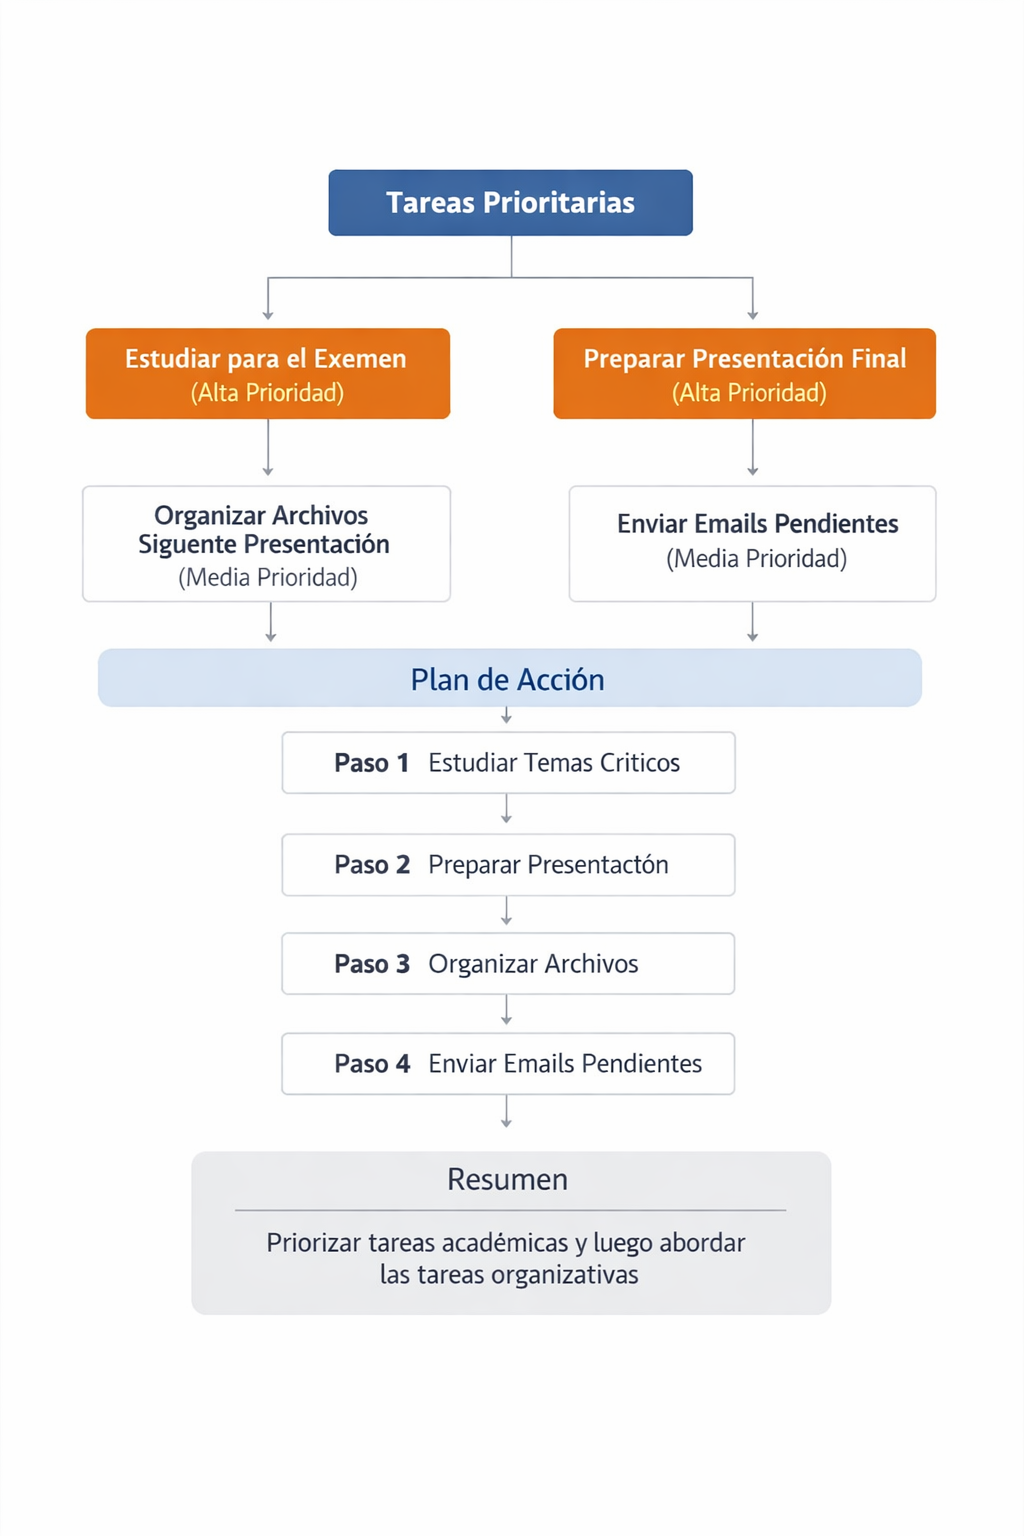